In [38]:
import os

In [39]:
from langgraph.graph import START,END,StateGraph
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace

In [40]:
from typing import TypedDict,Annotated,Literal,Optional

In [151]:
# class QuadState(TypedDict):
#     a:float
#     b:float
#     c:float

#     equation:str
#     discriminant:float
#     result=str

In [152]:
from typing import TypedDict, Annotated
from langgraph.graph.state import LastValue

class QuadState(TypedDict):
    a: float
    b: float
    c: float

    equation: Annotated[str, LastValue]
    discriminant: Annotated[float, LastValue]
    result: Annotated[str, LastValue]


In [153]:
def show_equation(state :QuadState):

    equation=f'{state['a']}x2+{state['b']}x+{state['c']}'
    
    return {
        **state,
        'equation':equation
    }
    
    

In [154]:
def calculate_discriminant(state :QuadState):
    
    discriminant=(state['b']**2)-(4*(state['a'])*(state['c']))

    return {
        **state,
        'discriminant':discriminant
    }


In [155]:
def real_root(state :QuadState):

    root1= (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2= (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])

    result=f'The roots are {root1} and {root2}'

    return {
        **state,
        'result':result
    }

In [45]:
def repeated_roots(state :QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {
        **state,
        'result':result
    }

In [156]:
def no_real_roots(state :QuadState):

    result='no real root'

    return {
        **state,
        'result':result
    }


In [157]:
def check_condition(state :QuadState)->Literal["real_root","repeated_roots","no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_root"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [158]:
graph=StateGraph(QuadState)

In [159]:
graph.add_node('show_equation',show_equation)

In [167]:
# graph.add_node('calculate_discriminant',calculate_discriminant)
# graph.add_node('real_root',real_root)
# graph.add_node('repeated_roots',repeated_roots)

# graph.add_node('no_real_roots',no_real_roots)

In [168]:
graph.add_edge(START,'show_equation')

In [169]:
graph.add_edge('show_equation','calculate_discriminant')


In [170]:
graph.add_conditional_edges('calculate_discriminant',check_condition)

In [171]:
graph.add_edge('real_root', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

In [172]:
workflow=graph.compile()

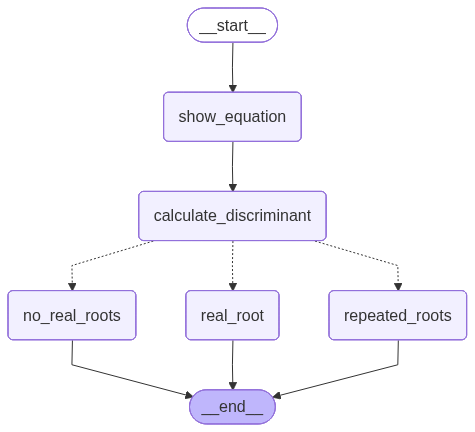

In [173]:
workflow

In [174]:
intial_state={
    'a':62,
    'b':22,
    'c':21,
    'result':" "
    
}
final_state=workflow.invoke(intial_state)

In [175]:
print(final_state)

{'a': 62, 'b': 22, 'c': 21, 'equation': '62x2+22x+21', 'discriminant': -4724, 'result': 'no real root'}
